# Detecção de Objetos utilizando a biblioteca  OpenCV
   #### por G.Paresqui

In [1]:
#importando as bibliotecas Opencv e pyplot
import cv2 
import matplotlib.pyplot as plt


In [2]:
arq_config = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
model_frozen = 'frozen_inference_graph.pb'

In [3]:
modelo = cv2.dnn_DetectionModel(model_frozen, arq_config)


In [4]:
modeloClasses = []   #Lista vazia
nome_arquivo = 'modelos.txt'
with open (nome_arquivo, 'rt') as fpt:
    modeloClasses = fpt.read().rstrip('\n').split('\n')
    

    

In [5]:
print(modeloClasses)

['pessoa', 'bicicleta', 'carro', 'moto', 'aviao', 'onibus', 'trem', 'caminhao', 'barco', 'semaforo', 'hidrante', 'sinal de pare', 'parquimetro', 'banco', 'passaro', 'gato', 'cachorro', 'cavalo', 'ovelha', 'vaca', 'elefante', 'urso', 'zebra', 'girafa', 'mochila', 'gravata', 'bolsa', 'guarda-chuva', 'mala', 'frisbee', 'esqui', 'snowboard', 'bola de esporte', 'pipa', 'bastao de baseball ', 'luva de baseball ', 'skateboard', 'surfboard', 'raquete de tennis ', 'garrafa', 'garrafa de vinho', 'copo', 'garfo', 'faca', 'colher', 'tigela', 'banana', 'maÃ§a', 'sanduiche', 'laranja', 'brocoles', 'cenoura', 'cachorro quente', 'pizza', 'donut', 'bolo', 'banheiro', 'sofa', 'refrigerador', 'cama', 'mesa de jantar', 'cadeira', 'monitor de tv', 'vaso de planta', 'mouse', 'remote', 'teclado', 'celular', 'microondas', 'secador de cabelo', 'torradeira', 'pia', 'computador portatil', 'livro', 'relogio', 'vaso', 'tesoura', 'urso de pelucia', 'forno', 'escova de dente']


In [6]:
modelo.setInputSize (320, 320)
modelo.setInputScale (1.0/127.5)  #255/2 = 127.5
modelo.setInputMean ((127.5, 127.5, 127.5))
modelo.setInputSwapRB (True)

<dnn_Model 000002554F94DDF0>

### Lendo uma imagem


In [7]:
imagem = cv2.imread('man-car.jpg')   #Carregando a imagem com o OpenCV

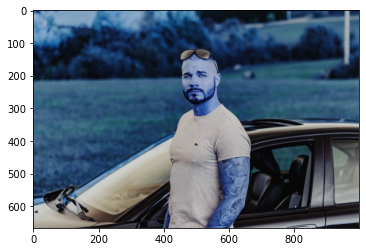

In [8]:
plt.imshow(imagem)              #Exibindo a imagem com o Matplotlib

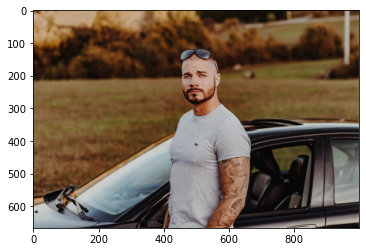

In [9]:
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))  #Corrigindo a paleta de cores da imagem

In [10]:
ClassIndex, confidece, bbox = modelo.detect(imagem,confThreshold=0.5)

print(ClassIndex)         ##Identifica os objetos na imagem e aponta para o indice da lista que corresponde a imagem, neste caso
                         ## indice [1] == Pessoa e indice[3] == carro

[[1]
 [3]]


In [11]:
tamanho_fonte = 3
fonte = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    cv2.rectangle(imagem, boxes, (255, 0, 0), 2)
    cv2.putText(imagem, modeloClasses[ClassInd-1], (boxes[0]+10, boxes[1]+40), fonte, fontScale = tamanho_fonte, color=(0,255,0), thickness = 3)
                                

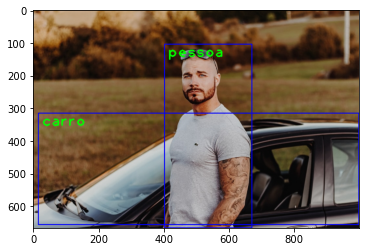

In [12]:
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))

### Lendo um Video

In [13]:
captura = cv2.VideoCapture('Insira aqui o nome do seu video e a extensão do arquivo')

#Checando se o video foi importado corretamente
if not  captura.isOpened():
    captura = cv2.VideoCapture(0)
if not captura.isOpened():
    raise IOError('Nao é possível abrir o video')
    
    
tamanho_fonte = 1.7
fonte = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = captura.read()
    
    ClassIndex, confidece, bbox = modelo.detect(frame,confThreshold=0.55)
    
  #  print(ClassIndex)
    if (len(ClassIndex) != 0):
        for ClassInd, conf, boxes in zip (ClassIndex.flatten(), confidece.flatten(), bbox):
             if (ClassInd <= 80):
                cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                cv2.putText(frame, modeloClasses[ClassInd-1], (boxes[0]+10, boxes[1]+40), fonte, fontScale = tamanho_fonte, color=(0,255,0), thickness=3)
    
     
    cv2.imshow('Detectando Objetos com OpenCV', frame)
    
      
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
            
        
        
captura.release()
cv2.destroyAllWindows()
    

KeyboardInterrupt: 